<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/bangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_csv("/content/listings.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1625.0,15,65,2024-09-17,0.40,1,362,1,NaN
1,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,NaN,1,0,NaN,NaN,2,0,0,NaN
2,28745,modern-style apartment in Bangkok,123784,Familyroom,NaN,Bang Kapi,13.75232,100.62402,Private room,NaN,60,0,NaN,NaN,1,0,0,NaN
3,47516,Beautiful waterfront house,214456,Anuradha,NaN,Don Mueang,13.92726,100.58529,Entire home/apt,4266.0,3,0,NaN,NaN,1,365,0,NaN
4,48736,Condo with Chaopraya River View,222005,Athitaya,NaN,Rat Burana,13.68556,100.49535,Private room,1477.0,14,1,2014-02-03,0.01,1,365,0,NaN


In [11]:
len(df.columns)


18

In [13]:
for c in df.columns:
    print(c)


id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm
license


In [14]:
df.shape


(28196, 18)

In [23]:
df.isnull().mean().sort_values(ascending=False)
# 컬럼별 결측치 비율 (내림차순)

,0
license,1.000000
neighbourhood_group,1.000000
reviews_per_month,0.347957
last_review,0.347957
price,0.196127
host_name,0.033338
name,0.000000
id,0.000000
neighbourhood,0.000000
host_id,0.000000


price 결측률

reviews_per_month 결측 (리뷰 없는 숙소)

last_review 결측 (활성 여부 판단용)

In [24]:
df["price"].describe()
# 컬럼별 결측치 비율 (내림차순)


,price
count,22666.000000
mean,2470.658828
std,16506.175624
min,50.000000
25%,903.000000
50%,1350.000000
75%,2110.000000
max,1000000.000000


median vs mean 차이

max 값 (이상치)

<Axes: >

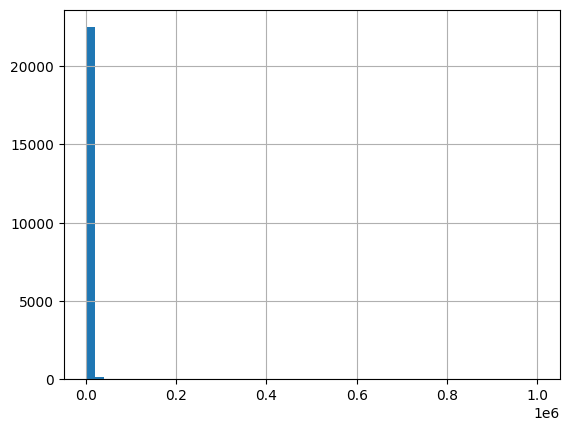

In [25]:
# 가격 분포 시각화
df["price"].hist(bins=50)


In [26]:
# 가격 이상치 기준 탐색 (상위 분위수)
df["price"].quantile([0.95, 0.97, 0.99])


,price
0.95,5785.75
0.97,7893.10
0.99,17005.60


In [27]:
# 숙소 유형 비율
df["room_type"].value_counts(normalize=True)

,proportion
room_type,
Entire home/apt,0.652575
Private room,0.322031
Hotel room,0.013974
Shared room,0.011420


Private room 비중 높으면 → 가성비 시장 근거

In [28]:
# 숙소 유형별 가격 중앙값
df.groupby("room_type")["price"].median().sort_values()


,price
room_type,
Shared room,360.0
Private room,1087.0
Entire home/apt,1472.0
Hotel room,1615.5


Entire home vs Private room 가격 격차 확인

In [29]:
# 연간 가용성 분포
df["availability_365"].describe()

,availability_365
count,28196.000000
mean,252.453788
std,126.558233
min,0.000000
25%,174.000000
50%,299.000000
75%,364.000000
max,365.000000


값이 낮을수록 예약이 많이 된 숙소

In [31]:
# 최근 1년 리뷰 수 (실질 수요 지표)
df["number_of_reviews_ltm"].describe()


,number_of_reviews_ltm
count,28196.000000
mean,6.015960
std,16.740911
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,1241.000000


In [32]:
# 최근 1년 내 리뷰가 1개 이상 있는 숙소 비율
(df["number_of_reviews_ltm"] > 0).mean()


np.float64(0.525819265143992)

현재 시장에서 실제로 거래되는 숙소 비율


In [33]:
# 숙소 수가 많은 지역 TOP 10
df["neighbourhood"].value_counts().head(10)

,count
neighbourhood,
Vadhana,4342
Khlong Toei,3597
Huai Khwang,3302
Ratchathewi,1597
Sathon,1285
Phra Nakhon,1243
Phra Khanong,1147
Bang Rak,1136
Chatu Chak,832


In [34]:
# 지역별 가격 중앙값 TOP 10
df.groupby("neighbourhood")["price"].median().sort_values(ascending=False).head(10)


,price
neighbourhood,
Parthum Wan,2293.5
Vadhana,1800.0
Samphanthawong,1620.0
Ratchathewi,1600.0
Khlong Toei,1565.0
Bang Rak,1528.0
Huai Khwang,1421.0
Pom Prap Sattru Phai,1389.0
Lat Phrao,1382.0


In [35]:
# 지역별 평균 가용성 (수요가 높은 지역 = 낮은 값)
df.groupby("neighbourhood")["availability_365"].mean().sort_values().head(10)


,availability_365
neighbourhood,
Nong Khaem,126.500000
Nong Chok,176.058824
Bang Khae,198.247312
Khlong Sam Wa,200.891304
Phasi Charoen,206.097938
Thung khru,210.972222
Saphan Sung,213.239583
Yan na wa,215.723906
Chom Thong,216.705882


In [36]:
# 호스트가 보유한 숙소 수 분포
df["calculated_host_listings_count"].describe()

,calculated_host_listings_count
count,28196.000000
mean,28.668251
std,47.588755
min,1.000000
25%,2.000000
50%,8.000000
75%,33.000000
max,217.000000


In [37]:
# 다주택 호스트(숙소 2개 이상) 비율
(df["calculated_host_listings_count"] > 1).mean()


np.float64(0.805256064690027)

다주택 비율 높으면 → 상업화된 시장 성격